In [31]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [20]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke

from sklearn import datasets
def load_digits():
    return datasets.load_digits()

digits = load_digits()


In [21]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [22]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
digits.data
digits.data.shape
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

def predict(n_clusters:int,random_state:int,digits)-> (KMeans, np.ndarray):
    km = KMeans(n_clusters=n_clusters, random_state=random_state)
    pred = km.fit_predict(digits)

    return km, pred

model, clusters = predict(n_clusters=10, random_state=0, digits=digits.data)

c:\Users\darab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.

model.cluster_centers_.shape
#model.cluster_centers_.max()

(10, 64)

In [25]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
from time import sleep
from IPython.display import clear_output
'''for i in range(10):
    plt.plot(model.cluster_centers_.transpose()[:, :i+1], 'o:')
    plt.show()
    sleep(1)
    clear_output(wait=True)'''
    


"for i in range(10):\n    plt.plot(model.cluster_centers_.transpose()[:, :i+1], 'o:')\n    plt.show()\n    sleep(1)\n    clear_output(wait=True)"

In [26]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

from scipy.stats import mode
from numpy import ma
def get_labels(clusters:np.ndarray, digits)-> np.ndarray:
    result = np.zeros(clusters.shape[0])
    for i in range(10):
        ma_arr = ma.masked_equal(clusters, i)
        #mask = (clusters == i)
        #print(mask, ma_arr.mask)
        mod = mode(digits.target[ma_arr.mask], keepdims=False).mode
        print(mod)
        #result[mask] = mod
        result[ma_arr.mask] = mod

    return result
get_labels(clusters, digits)

4
3
5
9
7
0
1
8
2
6


array([0., 8., 8., ..., 8., 9., 9.])

In [27]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

c:\Users\darab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.79

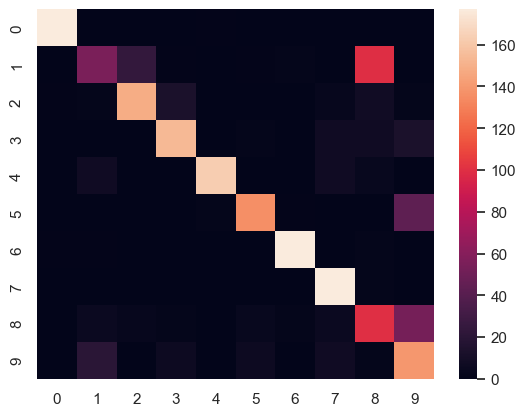

In [38]:
import HAZI09
from importlib import reload
HAZI09 = reload(HAZI09)
from HAZI09 import KMeansOnDigits

km = KMeansOnDigits(10, 0)
km.load_dataset()
km.predict()
km.get_labels()
km.calc_accuracy()
km.confusion_matrix()
sns.heatmap(km.mat)

km.accuracy

In [ ]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével


++ ha lesz meg energiam megjeleniteni egy adatsort......

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
- https://www.geeksforgeeks.org/recognizing-handwritten-digits-in-scikit-learn/
- https://towardsdatascience.com/the-concept-of-masks-in-python-50fd65e64707